In [1]:
import requests
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [2]:
source = 'https://statis.moi.gov.tw/micst/stmain.jsp?sys=220&ym=8100&ymt=11003&kind=21&type=1&funid=c0110201&cycle=41&outmode=0&compmode=0&outkind=1&fldlst=1111&cod00=1&rdm=hfzkXWl9'

In [3]:
import pprint
import requests
from lxml import etree
def get_table_from_html(html):
    tree = etree.HTML(html)
    table_lst = tree.xpath("//table")
    table_data_lst = []
    for table in table_lst:
        table_data_lst.append(get_table(table))
    return table_data_lst
def get_table(table_ele):
    tr_lst = table_ele.xpath(".//tr")
    title_data = get_title(tr_lst[0])
    data = get_data(tr_lst[1:])
    return {
        'title': title_data,
        'data': data
    }
def get_title(tr_ele):
    title_lst = get_tr_data_by_tag(tr_ele, 'th')
    if not title_lst:
        title_lst = get_tr_data_by_tag(tr_ele, 'td')

    return title_lst

def get_data(tr_lst):
    datas = []
    for tr in tr_lst:
        tr_data = get_tr_data_by_tag(tr, 'td')
        datas.append(tr_data)

    return datas


def get_tr_data_by_tag(tr, tag):
    datas = []
    nodes = tr.xpath(".//{tag}".format(tag=tag))
    for node in nodes:
        text = node.xpath('string(.)').strip()
        datas.append(text)

    return datas


def get_html(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36',
    }
    res = requests.get(url, headers=headers)
    res.encoding = 'big5'
    return res.text


def run():
    url = source
    # url = "https://www.phb123.com/qiye/35109.html"
    html = get_html(url)
    table_lst = get_table_from_html(html)
    #pprint.pprint(table_lst)
    return table_lst



In [4]:
if __name__ == '__main__':
    datalist=[]
    datalist = run()

In [5]:
dic = datalist[1]
dic

{'title': ['', '人口數', '幼年人口(0-14歲)', '工作年齡人口(15-64歲)', '老年人口(65歲以上)'],
 'data': [[],
  ['20,802,622', '5,361,347', '14,025,142', '1,416,133'],
  ['20,995,416', '5,279,705', '14,224,910', '1,490,801'],
  ['21,177,874', '5,169,581', '14,445,937', '1,562,356'],
  ['21,357,431', '5,076,083', '14,650,294', '1,631,054'],
  ['21,525,433', '4,982,543', '14,851,282', '1,691,608'],
  ['21,742,815', '4,914,280', '15,076,479', '1,752,056'],
  ['21,928,591', '4,815,400', '15,302,960', '1,810,231'],
  ['22,092,387', '4,734,596', '15,492,319', '1,865,472'],
  ['22,276,672', '4,703,093', '15,652,271', '1,921,308'],
  ['22,405,568', '4,661,884', '15,770,327', '1,973,357'],
  ['22,290,225', '4,699,134', '15,663,063', '1,928,028'],
  ['22,298,931', '4,697,438', '15,669,984', '1,931,509'],
  ['22,308,497', '4,694,839', '15,678,999', '1,934,659'],
  ['22,318,234', '4,692,781', '15,689,450', '1,936,003'],
  ['22,328,771', '4,690,770', '15,699,560', '1,938,441'],
  ['22,339,536', '4,687,952', '15,710,026', '

In [6]:
romankeyList = []
romanvalueList = []
for key, value in dic.items():
    romankeyList.append(key)
    romanvalueList.append(value)

In [7]:
col = romanvalueList[0]
if '' in col:
    col.remove('')
col

['人口數', '幼年人口(0-14歲)', '工作年齡人口(15-64歲)', '老年人口(65歲以上)']

In [8]:
row = romanvalueList[1]
type(row)

list

In [9]:
#轉list to df
df=pd.DataFrame(row,columns=col)
df = df.dropna(how='all')
df

,人口數,幼年人口(0-14歲),工作年齡人口(15-64歲),老年人口(65歲以上)
1,"20,802,622","5,361,347","14,025,142","1,416,133"
2,"20,995,416","5,279,705","14,224,910","1,490,801"
3,"21,177,874","5,169,581","14,445,937","1,562,356"
4,"21,357,431","5,076,083","14,650,294","1,631,054"
5,"21,525,433","4,982,543","14,851,282","1,691,608"
...,...,...,...,...
269,"23,561,236","2,963,396","16,810,525","3,787,315"
270,"23,525,623","2,944,743","16,748,137","3,832,743"
271,"23,548,633","2,954,824","16,790,176","3,803,633"
272,"23,539,588","2,950,269","16,772,709","3,816,610"


In [10]:
data_array = np.array(df.values)
data_array

array([['20,802,622', '5,361,347', '14,025,142', '1,416,133'],
       ['20,995,416', '5,279,705', '14,224,910', '1,490,801'],
       ['21,177,874', '5,169,581', '14,445,937', '1,562,356'],
       ...,
       ['23,548,633', '2,954,824', '16,790,176', '3,803,633'],
       ['23,539,588', '2,950,269', '16,772,709', '3,816,610'],
       ['23,525,623', '2,944,743', '16,748,137', '3,832,743']],
      dtype=object)

In [11]:
df.info()
df.head()
type(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 1 to 273
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   人口數             273 non-null    object
 1   幼年人口(0-14歲)     273 non-null    object
 2   工作年齡人口(15-64歲)  273 non-null    object
 3   老年人口(65歲以上)     273 non-null    object
dtypes: object(4)
memory usage: 10.7+ KB


pandas.core.frame.DataFrame

In [12]:
df = df.rename(columns={'人口數':'total'})
df = df.rename(columns={'幼年人口(0-14歲)':'young'})
df = df.rename(columns={'工作年齡人口(15-64歲)':'strong'})
df = df.rename(columns={'老年人口(65歲以上)':'old'})

In [13]:
import matplotlib
print(matplotlib.__file__)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

/Users/owen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py


In [14]:
#轉置string to int
df['total'] = df['total'].str.replace(',', '').astype(int)
df['young'] = df['young'].str.replace(',', '').astype(int)
df['strong'] = df['strong'].str.replace(',', '').astype(int)
df['old'] = df['old'].str.replace(',', '').astype(int)
type(df.total[1])
df

,total,young,strong,old
1,20802622,5361347,14025142,1416133
2,20995416,5279705,14224910,1490801
3,21177874,5169581,14445937,1562356
4,21357431,5076083,14650294,1631054
5,21525433,4982543,14851282,1691608
...,...,...,...,...
269,23561236,2963396,16810525,3787315
270,23525623,2944743,16748137,3832743
271,23548633,2954824,16790176,3803633
272,23539588,2950269,16772709,3816610


In [15]:
#index = ['81','82年','83年','84年','85年','86年','87年','88年','89年','90年','90年 1月','90年 2月','90年 3月','90年 4月','90年 5月','90年 6月','90年 7月','90年 8月','90年 9月','90年 10月','90年 11月','90年 12月','91年','91年 1月','91年 2月','91年 3月','91年 4月','91年 5月','91年 6月','91年 7月','91年 8月','91年 9月','91年 10月','91年 11月','91年 12月','92年','92年 1月','92年 2月','92年 3月','92年 4月','92年 5月','92年 6月','92年 7月','92年 8月','92年 9月','92年 10月','92年 11月','92年 12月','93年','93年 1月','93年 2月','93年 3月','93年 4月','93年 5月','93年 6月','93年 7月','93年 8月','93年 9月','93年 10月','93年 11月','93年 12月','94年','94年 1月','94年 2月','94年 3月','94年 4月','94年 5月','94年 6月','94年 7月','94年 8月','94年 9月','94年 10月','94年 11月','94年 12月','95年','95年 1月','95年 2月','95年 3月','95年 4月','95年 5月','95年 6月','95年 7月','95年 8月','95年 9月','95年 10月','95年 11月','95年 12月','96年','96年 1月','96年 2月','96年 3月','96年 4月','96年 5月','96年 6月','96年 7月','96年 8月','96年 9月','96年 10月','96年 11月','96年 12月','97年','97年 1月','97年 2月','97年 3月','97年 4月','97年 5月','97年 6月','97年 7月','97年 8月','97年 9月','97年 10月','97年 11月','97年 12月','98年','98年 1月','98年 2月','98年 3月','98年 4月','98年 5月','98年 6月','98年 7月','98年 8月','98年 9月','98年 10月','98年 11月','98年 12月','99年','99年 1月','99年 2月','99年 3月','99年 4月','99年 5月','99年 6月','99年 7月','99年 8月','99年 9月','99年 10月','99年 11月','99年 12月','100年','100年 1月','100年 2月','100年 3月','100年 4月','100年 5月','100年 6月','100年 7月','100年 8月','100年 9月','100年 10月','100年 11月','100年 12月','101年','101年 1月','101年 2月','101年 3月','101年 4月','101年 5月','101年 6月','101年 7月','101年 8月','101年 9月','101年 10月','101年 11月','101年 12月','102年','102年 1月','102年 2月','102年 3月','102年 4月','102年 5月','102年 6月','102年 7月','102年 8月','102年 9月','102年 10月','102年 11月','102年 12月','103年','103年 1月','103年 2月','103年 3月','103年 4月','103年 5月','103年 6月','103年 7月','103年 8月','103年 9月','103年 10月','103年 11月','103年 12月','104年','104年 1月','104年 2月','104年 3月','104年 4月','104年 5月','104年 6月','104年 7月','104年 8月','104年 9月','104年 10月','104年 11月','104年 12月','105年','105年 1月','105年 2月','105年 3月','105年 4月','105年 5月','105年 6月','105年 7月','105年 8月','105年 9月','105年 10月','105年 11月','105年 12月','106年','106年 1月','106年 2月','106年 3月','106年 4月','106年 5月','106年 6月','106年 7月','106年 8月','106年 9月','106年 10月','106年 11月','106年 12月','107年','107年 1月','107年 2月','107年 3月','107年 4月','107年 5月','107年 6月','107年 7月','107年 8月','107年 9月','107年 10月','107年 11月','107年 12月','108年','108年 1月','108年 2月','108年 3月','108年 4月','108年 5月','108年 6月','108年 7月','108年 8月','108年 9月','108年 10月','108年 11月','108年 12月','109年','109年 1月','109年 2月','109年 3月','109年 4月','109年 5月','109年 6月','109年 7月','109年 8月','109年 9月','109年 10月','109年 11月','109年 12月','110年(1月至3月)','110年 1月','110年 2月','110年 3月']

In [16]:
'''
df.index = index
index_array = np.array(index)
df = df.reset_index(inplace=False)
df.head()
'''

'\ndf.index = index\nindex_array = np.array(index)\ndf = df.reset_index(inplace=False)\ndf.head()\n'

In [17]:
#df = df.rename(columns={'index':'year'})
#df

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


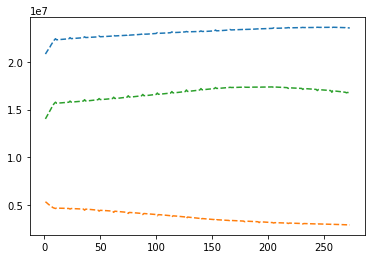

In [18]:
fig = plt.figure()
ax = plt.axes() #畫上刻度ㄎ
plt.plot(df.index, df.total, '--', df.index, df.young, '--', df.index, df.strong, '--')

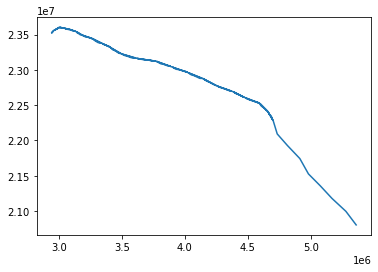

In [19]:
fig = plt.figure()
ax = plt.axes() #畫上刻度ㄎ
plt.plot(df.young, df.total)

/Users/owen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


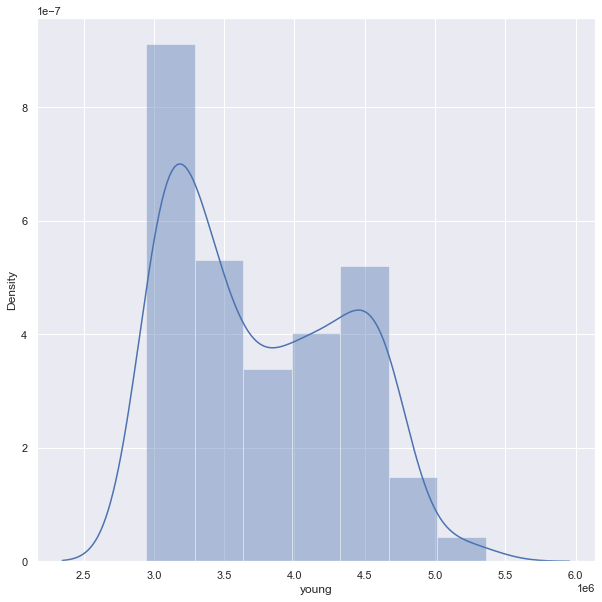

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(df['young'])
plt.show()

/Users/owen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


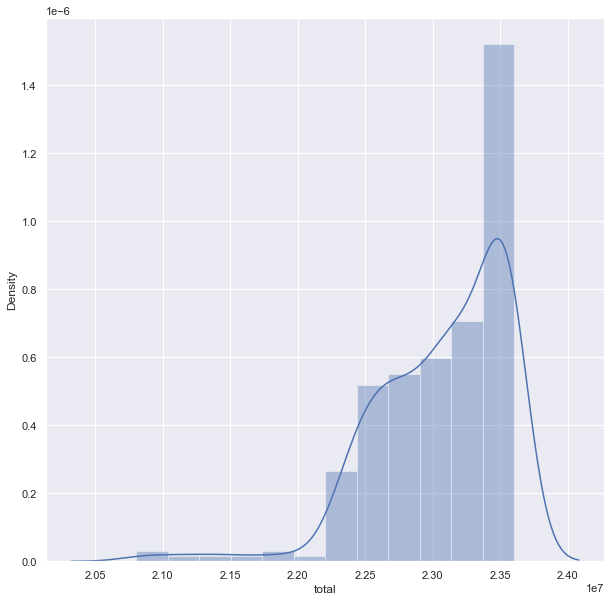

In [21]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(df['total'])
plt.show()

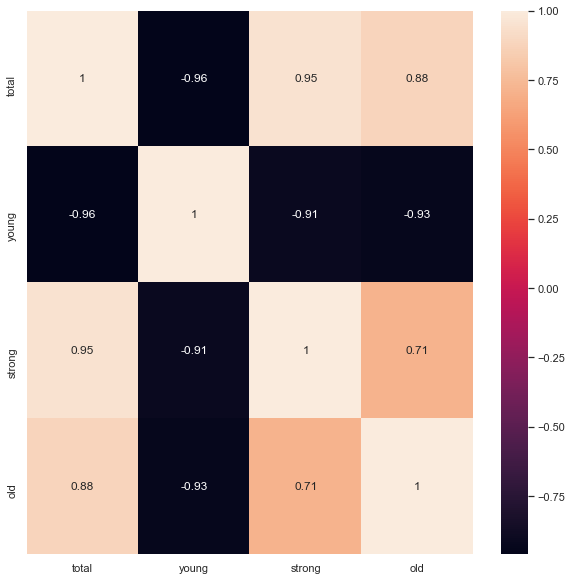

In [22]:
correlation_matrix = df.corr().round(2)
# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data=correlation_matrix, annot = True)

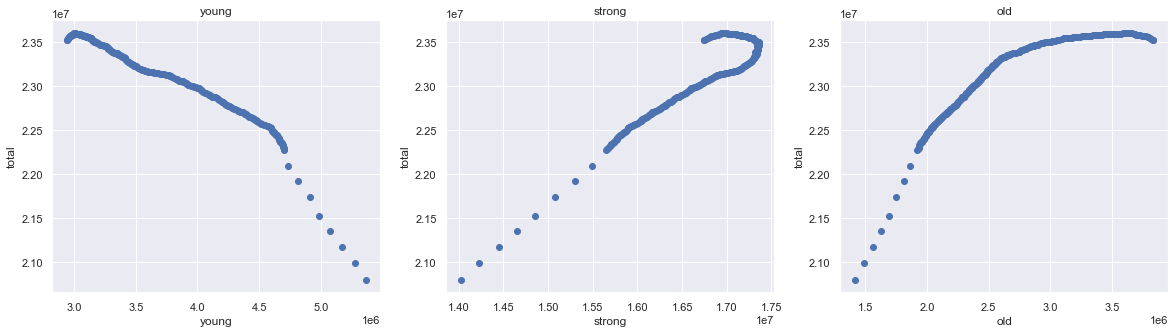

In [23]:
# 設定整張圖的長寬
plt.figure(figsize=(20, 5))
features = ['young','strong','old']
target = df['total']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target

    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('total')

In [24]:
X = pd.DataFrame(np.c_[df['young'], df['old']], columns = ['young','old'])
Y = df['total']

In [25]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# 再用.shape看切出來的資料的長相（列, 欄）
print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(218, 2)
(55, 2)
(218,)
(55,)


In [26]:
# Modeling
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 學習/訓練Fitting linear model
reg.fit(X_train,Y_train)
# 預測結果Predicting using the linear model
reg.predict(X_test)
# 真實結果：Y_test
# 測試準確度：
print('R2: ', reg.score(X_test, Y_test))

R2:  0.9303860697598495


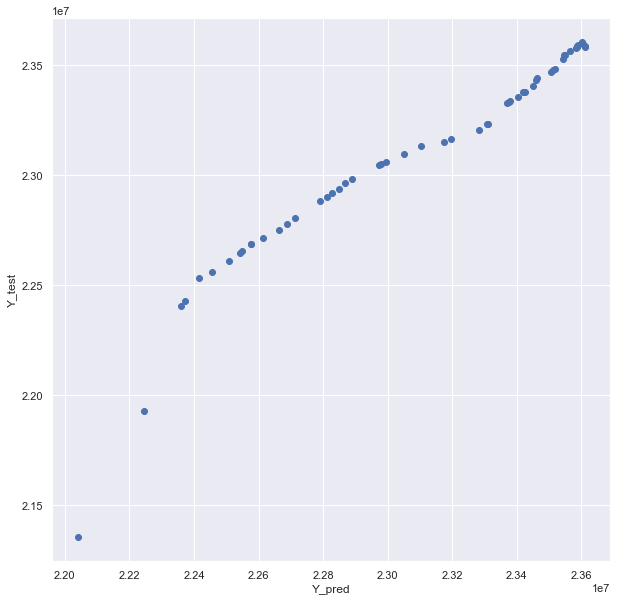

In [27]:
# plotting the y_test vs y_pred
Y_pred = reg.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

In [28]:
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))
reg.intercept_
print('RMSE is {}'.format(rmse))

RMSE is 120415.69565485803


In [29]:
#output: 2.7362403426066138
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
young,-0.861022
old,-0.109575


In [30]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

/Users/owen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
nmp=df.to_numpy()
nmp= nmp.reshape(4, -1)
nmp_data = np.delete(nmp, 0, axis=0) # axis=0代表按行操作
data_target = np.array(df.total)

In [32]:
type(nmp_data)
nmp_data= nmp_data.reshape(-1, 3)
nmp_data.shape

(273, 3)

In [33]:
data_target.shape

(273,)

In [34]:
X, y = shuffle(nmp_data, data_target, random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:05<00:00,  7.30it/s]


                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
ExtraTreesRegressor                          0.92       0.93   155941.74   
DecisionTreeRegressor                        0.91       0.92   158443.51   
XGBRegressor                                 0.91       0.92   162247.51   
GaussianProcessRegressor                     0.88       0.89   184864.26   
RandomForestRegressor                        0.87       0.88   194262.60   
GradientBoostingRegressor                    0.86       0.87   203077.82   
BaggingRegressor                             0.85       0.87   205597.20   
ExtraTreeRegressor                           0.81       0.83   235399.90   
HistGradientBoostingRegressor                0.80       0.83   237583.92   
KNeighborsRegressor                          0.79       0.82   244250.10   
LGBMRegressor                                0.77       0.79   259474.93   
AdaBoostRegr

In [45]:
X = pd.DataFrame(np.c_[df['young'], df['old']], columns = ['young','old'])
X

,young,old
0,5361347,1416133
1,5279705,1490801
2,5169581,1562356
3,5076083,1631054
4,4982543,1691608
...,...,...
268,2963396,3787315
269,2944743,3832743
270,2954824,3803633
271,2950269,3816610


In [46]:
import shap
import xgboost
shap.initjs()  # notebook环境下，加载用于可视化的JS代码

# 我们先训练好一个XGBoost model
X_b,y_b = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)


In [47]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值

In [52]:
# 可视化第一个prediction的解释   如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:],matplotlib=False)

In [53]:
y_base = explainer.expected_value
print(y_base)

pred = model.predict(xgboost.DMatrix(X))
print(pred.mean())

14591796.0
14591794.0


In [54]:
shap.force_plot(explainer.expected_value, shap_values, X)

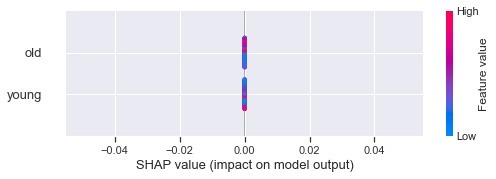

In [55]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [56]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

ValueError: Could not find feature named: RM